# <font color='red' size=6>Imports</font>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unicodedata import normalize

In [2]:
#!pip3 install xlrd

# <font color='red' size=6>Funções customizadas</font>

In [3]:
def remover_acentos(nome_da_coluna):
    return normalize('NFKD', nome_da_coluna).encode('ASCII', 'ignore').decode('ASCII')

In [4]:
def remover_caracteres_especiais(lista_nomes_colunas):
    lista_nomes_colunas = list(map(lambda x: remover_acentos(x), lista_nomes_colunas))
    lista_nomes_colunas = list(map(lambda st: str.replace(st, " ","_"), lista_nomes_colunas))
    lista_nomes_colunas = list(map(lambda st: str.replace(st, "(",""), lista_nomes_colunas))
    lista_nomes_colunas = list(map(lambda st: str.replace(st, ")",""), lista_nomes_colunas))
    lista_nomes_colunas = list(map(lambda st: str.replace(st, ".",""), lista_nomes_colunas))
    return lista_nomes_colunas

In [5]:
def remover_coluna_com_media_igual_zero(dados_df):
    colunas_com_media_zero_series = dados_df.mean() == 0
    dados_df = dados_df.loc[:, ~colunas_com_media_zero_series]
    return dados_df

# <font color='red' size=6>Loading Data</font>

#### <font color='green' size=5>URLs da planilhas</font>

In [6]:
papel = 'PETR4'
balanco_url = '../Dados_Historicos/%s/balanco.xls' % papel
precos_historicos_diario_url = '../Dados_Historicos/%s/precos_historicos_diario.csv' % papel
precos_historicos_semanal_url = '../Dados_Historicos/%s/precos_historicos_semanal.csv' % papel
precos_historicos_mensal_url = '../Dados_Historicos/%s/precos_historicos_mensal.csv' % papel

#### <font color='green' size=5>Leitura do arquivo balanco.xls</font>

#### Sheet Balanço Patrimonial

In [7]:
balanco_patrimonial_df = pd.read_excel(balanco_url, sheet_name='Bal. Patrim.', skiprows=[0], na_values=['NA'])
balanco_patrimonial_df.head()

WARNING *** file size (64180) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Unnamed: 0,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019,...,31/03/2013,31/12/2012,30/09/2012,30/06/2012,31/03/2012,31/12/2011,30/09/2011,30/06/2011,31/03/2011,31/12/2010
0,Ativo Total,9.982830e+08,9.874190e+08,9.654300e+08,1.015142e+09,9.716450e+08,9.260110e+08,9.244650e+08,9.652480e+08,9.490870e+08,...,6.953132e+08,6.777163e+08,6.466832e+08,6.280278e+08,6.158185e+08,5.991500e+08,5.821249e+08,5.545835e+08,5.449453e+08,5.199700e+08
1,Ativo Circulante,1.539720e+08,1.423230e+08,1.516440e+08,2.019260e+08,1.635620e+08,1.121010e+08,1.476010e+08,1.813330e+08,1.306050e+08,...,1.168933e+08,1.181018e+08,1.258077e+08,1.163206e+08,1.263735e+08,1.211637e+08,1.204934e+08,1.194935e+08,1.200364e+08,1.066852e+08
2,Caixa e Equivalentes de Caixa,6.815500e+07,6.085600e+07,7.163500e+07,1.065980e+08,8.038200e+07,2.971400e+07,5.488200e+07,6.405200e+07,3.647600e+07,...,2.723508e+07,2.762800e+07,3.018732e+07,2.631834e+07,3.990449e+07,3.574724e+07,3.365920e+07,3.467262e+07,4.334482e+07,3.032326e+07
3,Aplicações Financeiras,3.299000e+06,3.424000e+06,3.782000e+06,2.952000e+06,3.346000e+06,3.580000e+06,5.427000e+06,2.456000e+06,4.370000e+06,...,1.930161e+07,2.131573e+07,2.267356e+07,1.966845e+07,1.800280e+07,1.680847e+07,2.141079e+07,2.496926e+07,2.001577e+07,2.601730e+07
4,Contas a Receber,1.343200e+07,2.458400e+07,1.290500e+07,1.431600e+07,1.586600e+07,1.516400e+07,1.749500e+07,1.550900e+07,1.933600e+07,...,2.244198e+07,2.268051e+07,2.329128e+07,2.258724e+07,2.143655e+07,2.197470e+07,2.046637e+07,1.876293e+07,1.777767e+07,1.733398e+07


In [8]:
balanco_patrimonial_df = balanco_patrimonial_df.rename(columns={list(balanco_patrimonial_df)[0]: ""})
balanco_patrimonial_df.set_index("", inplace=True)
balanco_patrimonial_df = balanco_patrimonial_df.T
balanco_patrimonial_df.head()

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
31/03/2021,9.982830e+08,1.539720e+08,6.815500e+07,3299000.064,1.343200e+07,3.973000e+07,0.0,8.552000e+06,0.0,2.080400e+07,...,3.133950e+08,2.054320e+08,-1267000.064,0.0,1.286790e+08,0.0,0.0,0.0,-1.944900e+07,0.0
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,0.0,1.348300e+07,0.0,1.047600e+07,...,3.084100e+08,2.054320e+08,2448999.936,0.0,1.275120e+08,0.0,0.0,0.0,-2.698300e+07,0.0
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,0.0,2.385200e+07,0.0,9.680000e+06,...,2.477360e+08,2.054320e+08,2448999.936,0.0,7.203100e+07,0.0,0.0,0.0,-3.217600e+07,0.0
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,0.0,2.978800e+07,0.0,2.067800e+07,...,2.427660e+08,2.054320e+08,2448999.936,0.0,7.359000e+07,0.0,0.0,0.0,-3.870500e+07,0.0
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,0.0,1.315000e+07,0.0,1.958200e+07,...,2.318290e+08,2.054320e+08,2448999.936,0.0,7.630400e+07,0.0,0.0,0.0,-5.235600e+07,0.0


#### Sheet Demonstrativo de Resultados

In [9]:
demonstrativo_resultado_df = pd.read_excel(balanco_url, sheet_name='Dem. Result.', skiprows=[0], na_values=['NA'])
demonstrativo_resultado_df = demonstrativo_resultado_df.rename(columns={list(demonstrativo_resultado_df)[0]:""})
demonstrativo_resultado_df.set_index("", inplace=True)
demonstrativo_resultado_df = demonstrativo_resultado_df.T

WARNING *** file size (64180) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
demonstrativo_resultado_df.head()

,Receita Bruta de Vendas e/ou Serviços,Deduções da Receita Bruta,Receita Líquida de Vendas e/ou Serviços,Custo de Bens e/ou Serviços Vendidos,Resultado Bruto,Despesas Com Vendas,Despesas Gerais e Administrativas,Perdas pela Não Recuperabilidade de Ativos,Outras Receitas Operacionais,Outras Despesas Operacionais,...,Resultado Não Operacional,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período
31/03/2021,NaN,NaN,8.617400e+07,-4.214100e+07,4.403300e+07,-5198000.128,-1496000.000,0.0,0.0,-4.454000e+06,...,NaN,NaN,NaN,3.156000e+06,-649000.000,-1.231000e+06,NaN,NaN,-109000.000,1.167000e+06
31/12/2020,NaN,NaN,7.497199e+07,-3.461200e+07,4.036000e+07,-6049000.448,-473000.192,0.0,0.0,3.399800e+07,...,NaN,NaN,NaN,7.482100e+07,-1498000.128,-1.287100e+07,NaN,NaN,-561999.936,5.989000e+07
30/09/2020,NaN,NaN,7.073000e+07,-3.696100e+07,3.376900e+07,-6304999.936,-1664000.000,0.0,0.0,-6.851000e+06,...,NaN,NaN,NaN,-4.878000e+06,-26000.000,3.235000e+06,NaN,NaN,123000.000,-1.546000e+06
30/06/2020,NaN,NaN,5.089800e+07,-3.268000e+07,1.821800e+07,-6752000.000,-1568000.000,0.0,0.0,2.110000e+05,...,NaN,NaN,NaN,-3.288000e+06,-610000.000,1.085000e+06,NaN,NaN,100000.000,-2.713000e+06
31/03/2020,NaN,NaN,7.546900e+07,-4.385400e+07,3.161500e+07,-5913999.872,-1820000.000,0.0,0.0,-6.788200e+07,...,NaN,NaN,NaN,-6.661800e+07,-597000.000,1.749100e+07,NaN,NaN,1200999.936,-4.852300e+07


#### <font color='green' size=5>Leitura dos arquivos de preços históricos .csv</font>

In [11]:
precos_historicos_diario_df = pd.read_csv(precos_historicos_diario_url)
precos_historicos_diario_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,20.05.2021,"26,04","26,14","26,27","25,99","22,92M","-0,42%"
1,19.05.2021,"26,15","25,85","26,35","25,80","84,35M","-0,76%"
2,18.05.2021,"26,35","26,70","26,80","26,27","62,02M","-1,16%"
3,17.05.2021,"26,66","26,30","26,66","26,20","82,94M","1,45%"
4,14.05.2021,"26,28","25,80","26,38","25,55","195,81M","5,16%"
...,...,...,...,...,...,...,...
2810,08.01.2010,"29,12","29,29","29,47","29,05","14,66M","-0,55%"
2811,07.01.2010,"29,28","29,37","29,51","29,21","10,99M","-0,91%"
2812,06.01.2010,"29,55","29,00","29,55","29,00","18,74M","1,34%"
2813,05.01.2010,"29,16","29,46","29,50","29,00","21,43M","-0,85%"


In [12]:
precos_historicos_semanal_df = pd.read_csv(precos_historicos_semanal_url)
precos_historicos_semanal_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16.05.2021,"26,04","26,27","26,74","25,85","84,35M","-0,91%"
1,09.05.2021,"26,28","24,80","26,38","24,32","508,83M","7,79%"
2,02.05.2021,"24,38","23,80","24,45","22,88","294,39M","3,22%"
3,25.04.2021,"23,62","23,85","24,29","23,10","284,26M","-0,30%"
4,18.04.2021,"23,69","22,95","24,89","22,77","394,94M","3,22%"
...,...,...,...,...,...,...,...
589,31.01.2010,"24,84","27,02","27,32","24,21","100,71M","-7,76%"
590,24.01.2010,"26,93","27,02","27,62","26,41","70,22M","-1,68%"
591,17.01.2010,"27,39","28,29","28,90","26,84","102,58M","-2,77%"
592,10.01.2010,"28,17","29,33","29,43","27,99","94,85M","-3,26%"


In [13]:
precos_historicos_mensal_df = pd.read_csv(precos_historicos_mensal_url)
precos_historicos_mensal_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,Mai 21,"26,04","23,81","26,74","22,89","84,35M","10,25%"
1,Abr 21,"23,62","24,30","24,88","22,77","49,20M","-1,99%"
2,Mar 21,"24,10","22,80","24,23","20,48","2,07B","8,36%"
3,Fev 21,"22,24","27,26","30,92","21,40","2,32B","-16,67%"
4,Jan 21,"26,69","28,65","31,76","26,53","1,28B","-5,82%"
...,...,...,...,...,...,...,...
132,Mai 10,"23,67","25,84","25,90","20,79","484,90M","-9,10%"
133,Abr 10,"26,04","28,10","28,69","25,33","404,79M","-6,63%"
134,Mar 10,"27,89","27,44","29,54","26,89","470,45M","2,24%"
135,Fev 10,"27,28","27,02","27,50","24,21","335,17M","1,30%"


# <font color='red' size=6>Cleaning Data</font>
#### <font color='green' size=5>Dados históricos de Balanço Financeiro</font>

In [14]:
balanco_patrimonial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 31/03/2021 to 31/12/2010
Data columns (total 55 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ativo Total                                                   42 non-null     float64
 1   Ativo Circulante                                              42 non-null     float64
 2   Caixa e Equivalentes de Caixa                                 42 non-null     float64
 3   Aplicações Financeiras                                        42 non-null     float64
 4   Contas a Receber                                              42 non-null     float64
 5   Estoques                                                      42 non-null     float64
 6   Ativos Biológicos                                             42 non-null     float64
 7   Tributos a Recuperar                                         

#### Removendo acentos, espaços e caracteres especiais dos nomes das colunas

In [15]:
colunas_antigas_balanco = list(balanco_patrimonial_df.columns)
colunas_novas_balanco = remover_caracteres_especiais(colunas_antigas_balanco)

#### Criando dictionary para renomear colunas usando Pandas.

In [16]:
zip_iterator = zip(colunas_antigas_balanco, colunas_novas_balanco)
colunas_balanco_dictionary = dict(zip_iterator)

#### Renomeando colunas dos dados de Balanço Financeiro.

In [17]:
balanco_patrimonial_df.rename(columns=colunas_balanco_dictionary, inplace=True)
balanco_patrimonial_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Ativos_Biologicos,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,...,Patrimonio_Liquido,Capital_Social_Realizado,Reservas_de_Capital,Reservas_de_Reavaliacao,Reservas_de_Lucros,Lucros/Prejuizos_Acumulados,Ajustes_de_Avaliacao_Patrimonial,Ajustes_Acumulados_de_Conversao,Outros_Resultados_Abrangentes,Adiantamento_para_Futuro_Aumento_Capital
31/03/2021,9.982830e+08,1.539720e+08,6.815500e+07,3299000.064,1.343200e+07,3.973000e+07,0.0,8.552000e+06,0.0,2.080400e+07,...,3.133950e+08,2.054320e+08,-1267000.064,0.0,1.286790e+08,0.0,0.0,0.0,-1.944900e+07,0.0
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,0.0,1.348300e+07,0.0,1.047600e+07,...,3.084100e+08,2.054320e+08,2448999.936,0.0,1.275120e+08,0.0,0.0,0.0,-2.698300e+07,0.0
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,0.0,2.385200e+07,0.0,9.680000e+06,...,2.477360e+08,2.054320e+08,2448999.936,0.0,7.203100e+07,0.0,0.0,0.0,-3.217600e+07,0.0
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,0.0,2.978800e+07,0.0,2.067800e+07,...,2.427660e+08,2.054320e+08,2448999.936,0.0,7.359000e+07,0.0,0.0,0.0,-3.870500e+07,0.0
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,0.0,1.315000e+07,0.0,1.958200e+07,...,2.318290e+08,2.054320e+08,2448999.936,0.0,7.630400e+07,0.0,0.0,0.0,-5.235600e+07,0.0


#### Remover dados do balanço de 31/03/2021 (esse balanço não será utilizado)

In [18]:
balanco_patrimonial_df = balanco_patrimonial_df[1:]
balanco_patrimonial_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Ativos_Biologicos,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,...,Patrimonio_Liquido,Capital_Social_Realizado,Reservas_de_Capital,Reservas_de_Reavaliacao,Reservas_de_Lucros,Lucros/Prejuizos_Acumulados,Ajustes_de_Avaliacao_Patrimonial,Ajustes_Acumulados_de_Conversao,Outros_Resultados_Abrangentes,Adiantamento_para_Futuro_Aumento_Capital
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,0.0,1.348300e+07,0.0,1.047600e+07,...,3.084100e+08,2.054320e+08,2448999.936,0.0,1.275120e+08,0.0,0.0,0.0,-2.698300e+07,0.0
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,0.0,2.385200e+07,0.0,9.680000e+06,...,2.477360e+08,2.054320e+08,2448999.936,0.0,7.203100e+07,0.0,0.0,0.0,-3.217600e+07,0.0
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,0.0,2.978800e+07,0.0,2.067800e+07,...,2.427660e+08,2.054320e+08,2448999.936,0.0,7.359000e+07,0.0,0.0,0.0,-3.870500e+07,0.0
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,0.0,1.315000e+07,0.0,1.958200e+07,...,2.318290e+08,2.054320e+08,2448999.936,0.0,7.630400e+07,0.0,0.0,0.0,-5.235600e+07,0.0
31/12/2019,9.260110e+08,1.121010e+08,2.971400e+07,3580000.000,1.516400e+07,3.300900e+07,0.0,1.428700e+07,0.0,1.634700e+07,...,2.955410e+08,2.054320e+08,2448999.936,0.0,1.248290e+08,0.0,0.0,0.0,-3.716900e+07,0.0


In [19]:
balanco_patrimonial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 31/12/2020 to 31/12/2010
Data columns (total 55 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ativo_Total                                                   41 non-null     float64
 1   Ativo_Circulante                                              41 non-null     float64
 2   Caixa_e_Equivalentes_de_Caixa                                 41 non-null     float64
 3   Aplicacoes_Financeiras                                        41 non-null     float64
 4   Contas_a_Receber                                              41 non-null     float64
 5   Estoques                                                      41 non-null     float64
 6   Ativos_Biologicos                                             41 non-null     float64
 7   Tributos_a_Recuperar                                         

#### Removendo colunas com média igual a zero

In [20]:
balanco_patrimonial_df.mean() == 0


Ativo_Total                                                     False
Ativo_Circulante                                                False
Caixa_e_Equivalentes_de_Caixa                                   False
Aplicacoes_Financeiras                                          False
Contas_a_Receber                                                False
Estoques                                                        False
Ativos_Biologicos                                                True
Tributos_a_Recuperar                                            False
Despesas_Antecipadas                                            False
Outros_Ativos_Circulantes                                       False
Ativo_Realizavel_a_Longo_Prazo                                  False
Aplicacoes_Financeiras_Avaliadas_a_Valor_Justo                  False
Aplicacoes_Financeiras_Avaliadas_ao_Custo_Amortizado            False
Contas_a_Receber                                                False
Estoques           

In [21]:
balanco_patrimonial_df = remover_coluna_com_media_igual_zero(balanco_patrimonial_df)
balanco_patrimonial_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,Ativo_Realizavel_a_Longo_Prazo,...,Provisoes,Participacao_dos_Acionistas_Nao_Controladores,Patrimonio_Liquido,Capital_Social_Realizado,Reservas_de_Capital,Reservas_de_Lucros,Lucros/Prejuizos_Acumulados,Ajustes_de_Avaliacao_Patrimonial,Ajustes_Acumulados_de_Conversao,Outros_Resultados_Abrangentes
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,1.348300e+07,0.0,1.047600e+07,1.049740e+08,...,1.959300e+08,2740000.000,3.084100e+08,2.054320e+08,2448999.936,1.275120e+08,0.0,0.0,0.0,-2.698300e+07
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,2.385200e+07,0.0,9.680000e+06,1.282090e+08,...,1.911170e+08,2624999.936,2.477360e+08,2.054320e+08,2448999.936,7.203100e+07,0.0,0.0,0.0,-3.217600e+07
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,2.978800e+07,0.0,2.067800e+07,1.244490e+08,...,1.892060e+08,2955000.064,2.427660e+08,2.054320e+08,2448999.936,7.359000e+07,0.0,0.0,0.0,-3.870500e+07
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,1.315000e+07,0.0,1.958200e+07,1.197740e+08,...,1.943260e+08,3096000.000,2.318290e+08,2.054320e+08,2448999.936,7.630400e+07,0.0,0.0,0.0,-5.235600e+07
31/12/2019,9.260110e+08,1.121010e+08,2.971400e+07,3580000.000,1.516400e+07,3.300900e+07,1.428700e+07,0.0,1.634700e+07,7.130600e+07,...,1.915790e+08,3596000.000,2.955410e+08,2.054320e+08,2448999.936,1.248290e+08,0.0,0.0,0.0,-3.716900e+07


In [22]:
balanco_patrimonial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 31/12/2020 to 31/12/2010
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ativo_Total                                                   41 non-null     float64
 1   Ativo_Circulante                                              41 non-null     float64
 2   Caixa_e_Equivalentes_de_Caixa                                 41 non-null     float64
 3   Aplicacoes_Financeiras                                        41 non-null     float64
 4   Contas_a_Receber                                              41 non-null     float64
 5   Estoques                                                      41 non-null     float64
 6   Tributos_a_Recuperar                                          41 non-null     float64
 7   Despesas_Antecipadas                                         

#### <font color='green' size=5>Dados históricos do Demonstrativo de Resultados</font>

In [23]:
demonstrativo_resultado_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 31/03/2021 to 31/12/2010
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Receita Bruta de Vendas e/ou Serviços        0 non-null      float64
 1   Deduções da Receita Bruta                    0 non-null      float64
 2   Receita Líquida de Vendas e/ou Serviços      42 non-null     float64
 3   Custo de Bens e/ou Serviços Vendidos         42 non-null     float64
 4   Resultado Bruto                              42 non-null     float64
 5   Despesas Com Vendas                          42 non-null     float64
 6   Despesas Gerais e Administrativas            42 non-null     float64
 7   Perdas pela Não Recuperabilidade de Ativos   41 non-null     float64
 8   Outras Receitas Operacionais                 42 non-null     float64
 9   Outras Despesas Operacionais                 42 non-null     float

#### Removendo acentos, espaços e caracteres especiais dos nomes das colunas

In [24]:
colunas_antigas_dre = list(demonstrativo_resultado_df.columns)
colunas_novas_dre = remover_caracteres_especiais(colunas_antigas_dre)

#### Criando dictionary para renomear colunas usando Pandas.

In [25]:
zip_iterator = zip(colunas_antigas_dre, colunas_novas_dre)
colunas_dre_dictionary = dict(zip_iterator)

#### Renomeando colunas dos dados de Balanço Financeiro.

In [26]:
demonstrativo_resultado_df.rename(columns=colunas_dre_dictionary, inplace=True)
demonstrativo_resultado_df.head()

,Receita_Bruta_de_Vendas_e/ou_Servicos,Deducoes_da_Receita_Bruta,Receita_Liquida_de_Vendas_e/ou_Servicos,Custo_de_Bens_e/ou_Servicos_Vendidos,Resultado_Bruto,Despesas_Com_Vendas,Despesas_Gerais_e_Administrativas,Perdas_pela_Nao_Recuperabilidade_de_Ativos_,Outras_Receitas_Operacionais,Outras_Despesas_Operacionais,...,Resultado_Nao_Operacional,Receitas,Despesas,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Participacoes/Contribuicoes_Estatutarias,Reversao_dos_Juros_sobre_Capital_Proprio,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo
31/03/2021,NaN,NaN,8.617400e+07,-4.214100e+07,4.403300e+07,-5198000.128,-1496000.000,0.0,0.0,-4.454000e+06,...,NaN,NaN,NaN,3.156000e+06,-649000.000,-1.231000e+06,NaN,NaN,-109000.000,1.167000e+06
31/12/2020,NaN,NaN,7.497199e+07,-3.461200e+07,4.036000e+07,-6049000.448,-473000.192,0.0,0.0,3.399800e+07,...,NaN,NaN,NaN,7.482100e+07,-1498000.128,-1.287100e+07,NaN,NaN,-561999.936,5.989000e+07
30/09/2020,NaN,NaN,7.073000e+07,-3.696100e+07,3.376900e+07,-6304999.936,-1664000.000,0.0,0.0,-6.851000e+06,...,NaN,NaN,NaN,-4.878000e+06,-26000.000,3.235000e+06,NaN,NaN,123000.000,-1.546000e+06
30/06/2020,NaN,NaN,5.089800e+07,-3.268000e+07,1.821800e+07,-6752000.000,-1568000.000,0.0,0.0,2.110000e+05,...,NaN,NaN,NaN,-3.288000e+06,-610000.000,1.085000e+06,NaN,NaN,100000.000,-2.713000e+06
31/03/2020,NaN,NaN,7.546900e+07,-4.385400e+07,3.161500e+07,-5913999.872,-1820000.000,0.0,0.0,-6.788200e+07,...,NaN,NaN,NaN,-6.661800e+07,-597000.000,1.749100e+07,NaN,NaN,1200999.936,-4.852300e+07


#### Procurar e remover valores nulos

In [27]:
demonstrativo_resultado_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 31/03/2021 to 31/12/2010
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Receita_Bruta_de_Vendas_e/ou_Servicos        0 non-null      float64
 1   Deducoes_da_Receita_Bruta                    0 non-null      float64
 2   Receita_Liquida_de_Vendas_e/ou_Servicos      42 non-null     float64
 3   Custo_de_Bens_e/ou_Servicos_Vendidos         42 non-null     float64
 4   Resultado_Bruto                              42 non-null     float64
 5   Despesas_Com_Vendas                          42 non-null     float64
 6   Despesas_Gerais_e_Administrativas            42 non-null     float64
 7   Perdas_pela_Nao_Recuperabilidade_de_Ativos_  41 non-null     float64
 8   Outras_Receitas_Operacionais                 42 non-null     float64
 9   Outras_Despesas_Operacionais                 42 non-null     float

In [28]:
demonstrativo_resultado_df["Perdas_pela_Nao_Recuperabilidade_de_Ativos_"].mean()

0.0

In [29]:
demonstrativo_resultado_df.dropna(axis=1, inplace=True)

In [30]:
demonstrativo_resultado_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 31/03/2021 to 31/12/2010
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Receita_Liquida_de_Vendas_e/ou_Servicos   42 non-null     float64
 1   Custo_de_Bens_e/ou_Servicos_Vendidos      42 non-null     float64
 2   Resultado_Bruto                           42 non-null     float64
 3   Despesas_Com_Vendas                       42 non-null     float64
 4   Despesas_Gerais_e_Administrativas         42 non-null     float64
 5   Outras_Receitas_Operacionais              42 non-null     float64
 6   Outras_Despesas_Operacionais              42 non-null     float64
 7   Resultado_da_Equivalencia_Patrimonial     42 non-null     float64
 8   Financeiras                               42 non-null     float64
 9   Receitas_Financeiras                      42 non-null     float64
 10  Despesas_Financeiras        

#### Remover dados do demonstrativo do resultado de 31/03/2021 (esse DRE não será utilizado)

In [31]:
demonstrativo_resultado_df = demonstrativo_resultado_df[1:]
demonstrativo_resultado_df.head()

,Receita_Liquida_de_Vendas_e/ou_Servicos,Custo_de_Bens_e/ou_Servicos_Vendidos,Resultado_Bruto,Despesas_Com_Vendas,Despesas_Gerais_e_Administrativas,Outras_Receitas_Operacionais,Outras_Despesas_Operacionais,Resultado_da_Equivalencia_Patrimonial,Financeiras,Receitas_Financeiras,Despesas_Financeiras,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo
31/12/2020,7.497199e+07,-3.461200e+07,4.036000e+07,-6049000.448,-473000.192,0.0,3.399800e+07,173000.000,6.811997e+06,776999.936,6.035002e+06,7.482100e+07,-1498000.128,-1.287100e+07,-561999.936,5.989000e+07
30/09/2020,7.073000e+07,-3.696100e+07,3.376900e+07,-6304999.936,-1664000.000,0.0,-6.851000e+06,-917000.000,-2.291000e+07,667000.000,-2.357700e+07,-4.878000e+06,-26000.000,3.235000e+06,123000.000,-1.546000e+06
30/06/2020,5.089800e+07,-3.268000e+07,1.821800e+07,-6752000.000,-1568000.000,0.0,2.110000e+05,-1088999.936,-1.230800e+07,579000.000,-1.288700e+07,-3.288000e+06,-610000.000,1.085000e+06,100000.000,-2.713000e+06
31/03/2020,7.546900e+07,-4.385400e+07,3.161500e+07,-5913999.872,-1820000.000,0.0,-6.788200e+07,-1439000.064,-2.117800e+07,798000.000,-2.197600e+07,-6.661800e+07,-597000.000,1.749100e+07,1200999.936,-4.852300e+07
31/12/2019,7.262799e+07,-3.716300e+07,3.546500e+07,-4976000.000,-1840000.256,0.0,-1.413800e+07,-865000.000,-6.862001e+06,1258000.000,-8.119999e+06,6.783999e+06,2975000.576,-1.698000e+06,-385000.000,8.152999e+06


#### Removendo colunas com média igual a zero

In [32]:
demonstrativo_resultado_df.mean() == 0


Receita_Liquida_de_Vendas_e/ou_Servicos     False
Custo_de_Bens_e/ou_Servicos_Vendidos        False
Resultado_Bruto                             False
Despesas_Com_Vendas                         False
Despesas_Gerais_e_Administrativas           False
Outras_Receitas_Operacionais                 True
Outras_Despesas_Operacionais                False
Resultado_da_Equivalencia_Patrimonial       False
Financeiras                                 False
Receitas_Financeiras                        False
Despesas_Financeiras                        False
Resultado_Antes_Tributacao/Participacoes    False
Provisao_para_IR_e_Contribuicao_Social      False
IR_Diferido                                 False
Part_de_Acionistas_Nao_Controladores        False
Lucro/Prejuizo_do_Periodo                   False
dtype: bool

In [33]:
demonstrativo_resultado_df = remover_coluna_com_media_igual_zero(demonstrativo_resultado_df)
demonstrativo_resultado_df.head()

,Receita_Liquida_de_Vendas_e/ou_Servicos,Custo_de_Bens_e/ou_Servicos_Vendidos,Resultado_Bruto,Despesas_Com_Vendas,Despesas_Gerais_e_Administrativas,Outras_Despesas_Operacionais,Resultado_da_Equivalencia_Patrimonial,Financeiras,Receitas_Financeiras,Despesas_Financeiras,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo
31/12/2020,7.497199e+07,-3.461200e+07,4.036000e+07,-6049000.448,-473000.192,3.399800e+07,173000.000,6.811997e+06,776999.936,6.035002e+06,7.482100e+07,-1498000.128,-1.287100e+07,-561999.936,5.989000e+07
30/09/2020,7.073000e+07,-3.696100e+07,3.376900e+07,-6304999.936,-1664000.000,-6.851000e+06,-917000.000,-2.291000e+07,667000.000,-2.357700e+07,-4.878000e+06,-26000.000,3.235000e+06,123000.000,-1.546000e+06
30/06/2020,5.089800e+07,-3.268000e+07,1.821800e+07,-6752000.000,-1568000.000,2.110000e+05,-1088999.936,-1.230800e+07,579000.000,-1.288700e+07,-3.288000e+06,-610000.000,1.085000e+06,100000.000,-2.713000e+06
31/03/2020,7.546900e+07,-4.385400e+07,3.161500e+07,-5913999.872,-1820000.000,-6.788200e+07,-1439000.064,-2.117800e+07,798000.000,-2.197600e+07,-6.661800e+07,-597000.000,1.749100e+07,1200999.936,-4.852300e+07
31/12/2019,7.262799e+07,-3.716300e+07,3.546500e+07,-4976000.000,-1840000.256,-1.413800e+07,-865000.000,-6.862001e+06,1258000.000,-8.119999e+06,6.783999e+06,2975000.576,-1.698000e+06,-385000.000,8.152999e+06


In [34]:
demonstrativo_resultado_df.mean()


Receita_Liquida_de_Vendas_e/ou_Servicos     7.400655e+07
Custo_de_Bens_e/ou_Servicos_Vendidos       -5.036305e+07
Resultado_Bruto                             2.364350e+07
Despesas_Com_Vendas                        -3.686733e+06
Despesas_Gerais_e_Administrativas          -2.372422e+06
Outras_Despesas_Operacionais               -9.444931e+06
Resultado_da_Equivalencia_Patrimonial       5.662743e+04
Financeiras                                -4.954505e+06
Receitas_Financeiras                        1.410752e+06
Despesas_Financeiras                       -6.365258e+06
Resultado_Antes_Tributacao/Participacoes    3.239697e+06
Provisao_para_IR_e_Contribuicao_Social     -1.275960e+06
IR_Diferido                                 2.979873e+04
Part_de_Acionistas_Nao_Controladores       -4.547351e+04
Lucro/Prejuizo_do_Periodo                   2.195087e+06
dtype: float64

#### <font color='green' size=5>Unificando features e label</font>
#### Preparando features

In [35]:
demonstrativo_resultado_df.head()

,Receita_Liquida_de_Vendas_e/ou_Servicos,Custo_de_Bens_e/ou_Servicos_Vendidos,Resultado_Bruto,Despesas_Com_Vendas,Despesas_Gerais_e_Administrativas,Outras_Despesas_Operacionais,Resultado_da_Equivalencia_Patrimonial,Financeiras,Receitas_Financeiras,Despesas_Financeiras,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo
31/12/2020,7.497199e+07,-3.461200e+07,4.036000e+07,-6049000.448,-473000.192,3.399800e+07,173000.000,6.811997e+06,776999.936,6.035002e+06,7.482100e+07,-1498000.128,-1.287100e+07,-561999.936,5.989000e+07
30/09/2020,7.073000e+07,-3.696100e+07,3.376900e+07,-6304999.936,-1664000.000,-6.851000e+06,-917000.000,-2.291000e+07,667000.000,-2.357700e+07,-4.878000e+06,-26000.000,3.235000e+06,123000.000,-1.546000e+06
30/06/2020,5.089800e+07,-3.268000e+07,1.821800e+07,-6752000.000,-1568000.000,2.110000e+05,-1088999.936,-1.230800e+07,579000.000,-1.288700e+07,-3.288000e+06,-610000.000,1.085000e+06,100000.000,-2.713000e+06
31/03/2020,7.546900e+07,-4.385400e+07,3.161500e+07,-5913999.872,-1820000.000,-6.788200e+07,-1439000.064,-2.117800e+07,798000.000,-2.197600e+07,-6.661800e+07,-597000.000,1.749100e+07,1200999.936,-4.852300e+07
31/12/2019,7.262799e+07,-3.716300e+07,3.546500e+07,-4976000.000,-1840000.256,-1.413800e+07,-865000.000,-6.862001e+06,1258000.000,-8.119999e+06,6.783999e+06,2975000.576,-1.698000e+06,-385000.000,8.152999e+06


In [36]:
balanco_patrimonial_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,Ativo_Realizavel_a_Longo_Prazo,...,Provisoes,Participacao_dos_Acionistas_Nao_Controladores,Patrimonio_Liquido,Capital_Social_Realizado,Reservas_de_Capital,Reservas_de_Lucros,Lucros/Prejuizos_Acumulados,Ajustes_de_Avaliacao_Patrimonial,Ajustes_Acumulados_de_Conversao,Outros_Resultados_Abrangentes
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,1.348300e+07,0.0,1.047600e+07,1.049740e+08,...,1.959300e+08,2740000.000,3.084100e+08,2.054320e+08,2448999.936,1.275120e+08,0.0,0.0,0.0,-2.698300e+07
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,2.385200e+07,0.0,9.680000e+06,1.282090e+08,...,1.911170e+08,2624999.936,2.477360e+08,2.054320e+08,2448999.936,7.203100e+07,0.0,0.0,0.0,-3.217600e+07
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,2.978800e+07,0.0,2.067800e+07,1.244490e+08,...,1.892060e+08,2955000.064,2.427660e+08,2.054320e+08,2448999.936,7.359000e+07,0.0,0.0,0.0,-3.870500e+07
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,1.315000e+07,0.0,1.958200e+07,1.197740e+08,...,1.943260e+08,3096000.000,2.318290e+08,2.054320e+08,2448999.936,7.630400e+07,0.0,0.0,0.0,-5.235600e+07
31/12/2019,9.260110e+08,1.121010e+08,2.971400e+07,3580000.000,1.516400e+07,3.300900e+07,1.428700e+07,0.0,1.634700e+07,7.130600e+07,...,1.915790e+08,3596000.000,2.955410e+08,2.054320e+08,2448999.936,1.248290e+08,0.0,0.0,0.0,-3.716900e+07


In [37]:
balanco_dre_variacoes_df = pd.concat([balanco_patrimonial_df, demonstrativo_resultado_df], axis=1).reindex(balanco_patrimonial_df.index)
balanco_dre_variacoes_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,Ativo_Realizavel_a_Longo_Prazo,...,Outras_Despesas_Operacionais,Resultado_da_Equivalencia_Patrimonial,Financeiras,Receitas_Financeiras,Despesas_Financeiras,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,1.348300e+07,0.0,1.047600e+07,1.049740e+08,...,3.399800e+07,173000.000,6.811997e+06,776999.936,6.035002e+06,7.482100e+07,-1498000.128,-1.287100e+07,-561999.936,5.989000e+07
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,2.385200e+07,0.0,9.680000e+06,1.282090e+08,...,-6.851000e+06,-917000.000,-2.291000e+07,667000.000,-2.357700e+07,-4.878000e+06,-26000.000,3.235000e+06,123000.000,-1.546000e+06
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,2.978800e+07,0.0,2.067800e+07,1.244490e+08,...,2.110000e+05,-1088999.936,-1.230800e+07,579000.000,-1.288700e+07,-3.288000e+06,-610000.000,1.085000e+06,100000.000,-2.713000e+06
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,1.315000e+07,0.0,1.958200e+07,1.197740e+08,...,-6.788200e+07,-1439000.064,-2.117800e+07,798000.000,-2.197600e+07,-6.661800e+07,-597000.000,1.749100e+07,1200999.936,-4.852300e+07
31/12/2019,9.260110e+08,1.121010e+08,2.971400e+07,3580000.000,1.516400e+07,3.300900e+07,1.428700e+07,0.0,1.634700e+07,7.130600e+07,...,-1.413800e+07,-865000.000,-6.862001e+06,1258000.000,-8.119999e+06,6.783999e+06,2975000.576,-1.698000e+06,-385000.000,8.152999e+06


In [38]:
balanco_dre_variacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 31/12/2020 to 31/12/2010
Data columns (total 62 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ativo_Total                                                   41 non-null     float64
 1   Ativo_Circulante                                              41 non-null     float64
 2   Caixa_e_Equivalentes_de_Caixa                                 41 non-null     float64
 3   Aplicacoes_Financeiras                                        41 non-null     float64
 4   Contas_a_Receber                                              41 non-null     float64
 5   Estoques                                                      41 non-null     float64
 6   Tributos_a_Recuperar                                          41 non-null     float64
 7   Despesas_Antecipadas                                         

#### Preparando labels
 * As labels serão a variação do papel dos 3 meses (trimestral) após divulgação do Balanço e DRE.
     * Ex.: Label do Balanço e DRE de 31/12/2020 será a variação do papel nos meses de Janeiro, Fevereiro e Março de 2021

In [39]:
precos_historicos_mensal_df = precos_historicos_mensal_df[2:125]
precos_historicos_mensal_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2,Mar 21,"24,10","22,80","24,23","20,48","2,07B","8,36%"
3,Fev 21,"22,24","27,26","30,92","21,40","2,32B","-16,67%"
4,Jan 21,"26,69","28,65","31,76","26,53","1,28B","-5,82%"
5,Dez 20,"28,34","25,40","28,52","25,29","1,13B","13,82%"
6,Nov 20,"24,90","19,51","26,67","19,27","1,68B","31,47%"
...,...,...,...,...,...,...,...
120,Mai 11,"19,40","20,53","20,68","18,79","405,78M","-5,11%"
121,Abr 11,"20,44","22,75","22,93","20,07","399,50M","-9,77%"
122,Mar 11,"22,66","22,51","23,04","21,68","410,79M","0,36%"
123,Fev 11,"22,58","21,57","23,11","20,63","576,72M","5,50%"


In [40]:
precos_historicos_mensal_df = precos_historicos_mensal_df.apply(lambda x: x.str.replace(',','.'))
precos_historicos_mensal_df = precos_historicos_mensal_df.apply(lambda x: x.str.replace('%',''))
precos_historicos_mensal_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2,Mar 21,24.10,22.80,24.23,20.48,2.07B,8.36
3,Fev 21,22.24,27.26,30.92,21.40,2.32B,-16.67
4,Jan 21,26.69,28.65,31.76,26.53,1.28B,-5.82
5,Dez 20,28.34,25.40,28.52,25.29,1.13B,13.82
6,Nov 20,24.90,19.51,26.67,19.27,1.68B,31.47
...,...,...,...,...,...,...,...
120,Mai 11,19.40,20.53,20.68,18.79,405.78M,-5.11
121,Abr 11,20.44,22.75,22.93,20.07,399.50M,-9.77
122,Mar 11,22.66,22.51,23.04,21.68,410.79M,0.36
123,Fev 11,22.58,21.57,23.11,20.63,576.72M,5.50


In [41]:
precos_historicos_mensal_df.head(6)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2,Mar 21,24.10,22.80,24.23,20.48,2.07B,8.36
3,Fev 21,22.24,27.26,30.92,21.40,2.32B,-16.67
4,Jan 21,26.69,28.65,31.76,26.53,1.28B,-5.82
5,Dez 20,28.34,25.40,28.52,25.29,1.13B,13.82
6,Nov 20,24.90,19.51,26.67,19.27,1.68B,31.47
7,Out 20,18.94,19.64,21.14,17.74,1.44B,-3.42


In [42]:
precos_historicos_mensal_df['Var%'][120:123]

122     0.36
123     5.50
124    -0.73
Name: Var%, dtype: object

In [43]:
lista_var_trimestral = []
mes_inicial = 0
mes_final = 3

while mes_final <= precos_historicos_mensal_df.shape[0]:
    variacao_trimestral = np.prod((pd.to_numeric(precos_historicos_mensal_df[mes_inicial:mes_final]['Var%']).values / 100) + 1) - 1
    lista_var_trimestral.append(variacao_trimestral)
    mes_inicial += 3
    mes_final += 3

In [44]:
len(lista_var_trimestral)

41

In [45]:
lista_var_trimestral

[-0.1495886178160002,
 0.4452149493319999,
 -0.09006678424000003,
 0.5404349996100002,
 -0.5364221184309999,
 0.11786918528000023,
 0.012991791239999939,
 -0.018824844160000076,
 0.23735401017000002,
 0.11592044036000004,
 0.22992975439999985,
 -0.19550843371300008,
 0.3298018847959998,
 0.052278228907999935,
 0.2369313534159998,
 -0.146299428435,
 -0.025543247185000117,
 0.0958613022799999,
 0.44057857856000004,
 0.12802361504400017,
 0.24629820559999982,
 -0.07464683878,
 -0.43041845718399985,
 0.306194465408,
 -0.02894336378800011,
 -0.446086657268,
 0.04622905752499995,
 0.16355337689600025,
 -0.07609281713499993,
 -0.06973888173100007,
 0.13477210283600005,
 -0.08226265300000013,
 -0.05992574628800007,
 -0.12742332296199999,
 0.22578983538500008,
 -0.2103436338400001,
 0.10193859063200006,
 0.13538750032400015,
 -0.18776644163199996,
 -0.15699289403799999,
 0.05106877460000003]

#### Unificando features + label

In [46]:
balanco_dre_variacoes_df['var_trimestre'] = lista_var_trimestral
balanco_dre_variacoes_df.head()

,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Tributos_a_Recuperar,Despesas_Antecipadas,Outros_Ativos_Circulantes,Ativo_Realizavel_a_Longo_Prazo,...,Resultado_da_Equivalencia_Patrimonial,Financeiras,Receitas_Financeiras,Despesas_Financeiras,Resultado_Antes_Tributacao/Participacoes,Provisao_para_IR_e_Contribuicao_Social,IR_Diferido,Part_de_Acionistas_Nao_Controladores,Lucro/Prejuizo_do_Periodo,var_trimestre
31/12/2020,9.874190e+08,1.423230e+08,6.085600e+07,3424000.000,2.458400e+07,2.950000e+07,1.348300e+07,0.0,1.047600e+07,1.049740e+08,...,173000.000,6.811997e+06,776999.936,6.035002e+06,7.482100e+07,-1498000.128,-1.287100e+07,-561999.936,5.989000e+07,-0.149589
30/09/2020,9.654300e+08,1.516440e+08,7.163500e+07,3782000.128,1.290500e+07,2.979000e+07,2.385200e+07,0.0,9.680000e+06,1.282090e+08,...,-917000.000,-2.291000e+07,667000.000,-2.357700e+07,-4.878000e+06,-26000.000,3.235000e+06,123000.000,-1.546000e+06,0.445215
30/06/2020,1.015142e+09,2.019260e+08,1.065980e+08,2952000.000,1.431600e+07,2.759400e+07,2.978800e+07,0.0,2.067800e+07,1.244490e+08,...,-1088999.936,-1.230800e+07,579000.000,-1.288700e+07,-3.288000e+06,-610000.000,1.085000e+06,100000.000,-2.713000e+06,-0.090067
31/03/2020,9.716450e+08,1.635620e+08,8.038200e+07,3345999.872,1.586600e+07,3.123600e+07,1.315000e+07,0.0,1.958200e+07,1.197740e+08,...,-1439000.064,-2.117800e+07,798000.000,-2.197600e+07,-6.661800e+07,-597000.000,1.749100e+07,1200999.936,-4.852300e+07,0.540435
31/12/2019,9.260110e+08,1.121010e+08,2.971400e+07,3580000.000,1.516400e+07,3.300900e+07,1.428700e+07,0.0,1.634700e+07,7.130600e+07,...,-865000.000,-6.862001e+06,1258000.000,-8.119999e+06,6.783999e+06,2975000.576,-1.698000e+06,-385000.000,8.152999e+06,-0.536422


# <font color='red' size=6>Exploratory Data Analysis (EDA)</font>

In [47]:
balanco_dre_variacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 31/12/2020 to 31/12/2010
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ativo_Total                                                   41 non-null     float64
 1   Ativo_Circulante                                              41 non-null     float64
 2   Caixa_e_Equivalentes_de_Caixa                                 41 non-null     float64
 3   Aplicacoes_Financeiras                                        41 non-null     float64
 4   Contas_a_Receber                                              41 non-null     float64
 5   Estoques                                                      41 non-null     float64
 6   Tributos_a_Recuperar                                          41 non-null     float64
 7   Despesas_Antecipadas                                         

Text(0.5, 0, '')

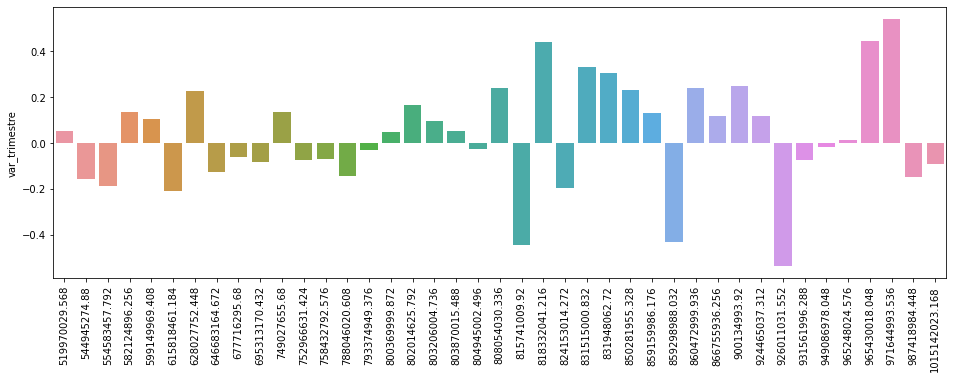

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(x='Ativo_Total', y='var_trimestre', data=balanco_dre_variacoes_df)
plt.xticks(rotation=90)
plt.xlabel('')

In [115]:
balanco_dre_variacoes_df.iloc[:, [1,2,-1]]

,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,var_trimestre
31/12/2020,1.423230e+08,6.085600e+07,-0.149589
30/09/2020,1.516440e+08,7.163500e+07,0.445215
30/06/2020,2.019260e+08,1.065980e+08,-0.090067
31/03/2020,1.635620e+08,8.038200e+07,0.540435
31/12/2019,1.121010e+08,2.971400e+07,-0.536422
30/09/2019,1.476010e+08,5.488200e+07,0.117869
30/06/2019,1.813330e+08,6.405200e+07,0.012992
31/03/2019,1.306050e+08,3.647600e+07,-0.018825
31/12/2018,1.436060e+08,5.385400e+07,0.237354
30/09/2018,1.502010e+08,5.680300e+07,0.115920
